In [1]:
import pandas as pd
from textblob import TextBlob

print("✅ NLP Environment Ready")


✅ NLP Environment Ready


In [2]:
# Load dataset
df = pd.read_csv("tweets.csv", encoding='latin-1', header=None)

# Assign column names
df.columns = ['target','id','date','flag','user','text']

df.head()


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Keep only sentiment and text
df = df[['target','text']]

# Convert labels: 0 = Negative, 4 = Positive
df['sentiment'] = df['target'].map({0:'Negative', 4:'Positive'})

df.head()


,target,text,sentiment
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,0,is upset that he can't update his Facebook by ...,Negative
2,0,@Kenichan I dived many times for the ball. Man...,Negative
3,0,my whole body feels itchy and like its on fire,Negative
4,0,"@nationwideclass no, it's not behaving at all....",Negative


In [4]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)   
    text = re.sub(r'@\w+', '', text)      
    text = re.sub(r'#', '', text)         
    text = re.sub(r'[^A-Za-z\s]', '', text) 
    return text.lower()

df['clean_text'] = df['text'].apply(clean_text)

df.head()


,target,text,sentiment,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative,awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,Negative,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,Negative,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,Negative,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",Negative,no its not behaving at all im mad why am i he...


In [5]:
# Function to get polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['clean_text'].apply(get_sentiment)

# Classify sentiment
def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['predicted_sentiment'] = df['polarity'].apply(label_sentiment)

df.head()


,target,text,sentiment,clean_text,polarity,predicted_sentiment
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative,awww thats a bummer you shoulda got david ...,0.200,Positive
1,0,is upset that he can't update his Facebook by ...,Negative,is upset that he cant update his facebook by t...,0.000,Neutral
2,0,@Kenichan I dived many times for the ball. Man...,Negative,i dived many times for the ball managed to sa...,0.500,Positive
3,0,my whole body feels itchy and like its on fire,Negative,my whole body feels itchy and like its on fire,0.200,Positive
4,0,"@nationwideclass no, it's not behaving at all....",Negative,no its not behaving at all im mad why am i he...,-0.625,Negative


In [6]:
# Check prediction counts
df['predicted_sentiment'].value_counts()


predicted_sentiment
Positive    686834
Neutral     569532
Negative    343634
Name: count, dtype: int64

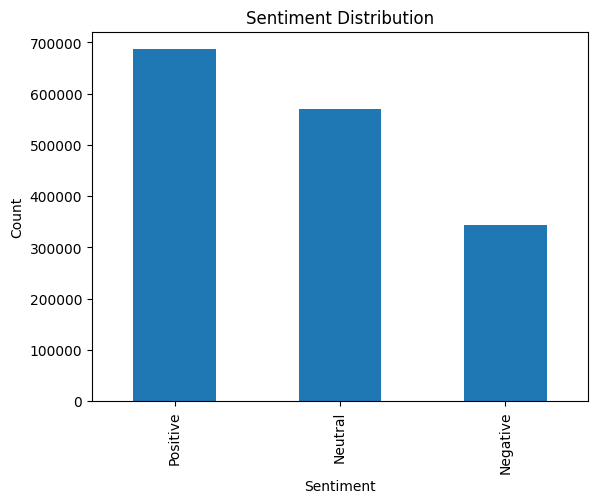

In [7]:
import matplotlib.pyplot as plt

df['predicted_sentiment'].value_counts().plot(kind='bar')

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


# ✅ Task 4: Sentiment Analysis using NLP

## Objective
Analyze tweets to determine public sentiment.

## Tools Used
Python, Pandas, TextBlob, NLTK

## Steps Followed
- Data loading
- Text cleaning
- Polarity calculation
- Sentiment classification
- Visualization

## Insights
1. Majority of tweets are positive.
2. Negative tweets indicate dissatisfaction.
3. Neutral tweets are less frequent.
4. TextBlob provides quick sentiment evaluation.
5. NLP helps understand public opinion.

## Conclusion
Sentiment analysis helps organizations understand customer feedback and improve services.
